In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML



class OrBi():
    def __init__(self, mat):
        self.mat = mat
        self.df = pd.DataFrame(mat)  
        
        
    def gini_mu(self, rows,cols):
        _, r_mu = self.r_par(cols)
        _, c_mu = self.c_par(rows)
        return r_mu+c_mu-r_mu*c_mu
        
        
    def r_par(self,cols):    
#         display(self.df.loc[:,cols])
#         display(self.df.style.applymap(self._bg_map,
#                                subset=pd.IndexSlice[:,cols]))
        
        mat_pat,index, counts = np.unique(self.mat[:,cols],axis=0,return_index=1, return_counts=1)
#         print(mat_pat,index,counts)

#         display(pd.DataFrame(mat_pat, index=[counts,index]))
#         print(np.power(2,np.sum(mat_pat,axis=1)))

        

        
        gini = 1 - np.sum(np.square(counts/np.sum(counts)))        
        gini_m = 1 - np.dot(np.square(counts/np.sum(counts)), 
                            np.power(2,np.sum(mat_pat,axis=1)))
#         print(f'For row partitions on cols of{cols}:\n\n \
#                 gini : {gini}\n   \
#               gini_m : {gini_m}           ')
        return gini, gini_m
        
        
        
    def c_par(self,rows):    
#         display(self.df.loc[:,rows])
#         display(self.df.style.applymap(self._bg_map,
#                                subset=pd.IndexSlice[rows,:]))
        
        
        mat_pat,index, counts = np.unique(self.mat[rows,:],axis=1,return_index=1, return_counts=1)
        

#         print(mat_pat,index,counts)
#         display(pd.DataFrame(mat_pat, columns=[counts,index]))
#         print(np.power(2,np.sum(mat_pat,axis=0)))
        
        gini = 1 - np.sum(np.square(counts/np.sum(counts)))        
        gini_m = 1 - np.dot(np.square(counts/np.sum(counts)), 
                            np.power(2, np.sum(mat_pat,axis=0)))
#         print(f'For column partitions on rows of{rows}:\n\n \
#                 gini : {gini}\n   \
#               gini_m : {gini_m}           ')
        return gini, gini_m
        
    def proj(self, row, cols):
        
#         print(f'Projections of columns {cols} on row {row}')
        return self.df.style.applymap(self._bg_map,
                               subset=pd.IndexSlice[row,cols])
    def rstr(self, col, rows):
        
#         print(f'Restriction of rows {rows} on column {col}')        
        return self.df.style.applymap(self._bg_map,
                               subset=pd.IndexSlice[rows,col])
    
        
    def _bg_map(self,val, color='yellow'):
        return f'background-color: {color}'
    
    def _powerset(self,iterable):
        "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
        from itertools import chain,combinations

        s = list(iterable)
        return list(chain.from_iterable(combinations(s, r) for r in range(len(s)+1)))[1:]
    def _allBi(self):
        
        s_r = list(self._powerset( range(self.mat.shape[0])))
        s_c = list(self._powerset( range(self.mat.shape[1])))
        
        from itertools import product
        
        return product(s_r,s_c)
    
    def allBi_giniu(self):
        
        all_bi = list(self._allBi())
        df_giniu_all = pd.DataFrame()
#         print(all_bi)
        gini_u_all = [self.gini_mu(i[0],i[1]) for i in all_bi]
        return pd.DataFrame(gini_u_all,index=all_bi,columns=['Gini_u'])
    def show_bi(self,rows,cols):
        return self.df.style.applymap(self._bg_map,
                               subset=pd.IndexSlice[rows,cols])
        

    
    
    
    

In [2]:
size = (5, 5)
mat = np.random.choice([1,0],size)
orbi = OrBi(mat)

df_giniu_all = orbi.allBi_giniu()


In [3]:
type(df_giniu_all.index)

pandas.core.indexes.base.Index

In [4]:
df_giniu_all

,Gini_u
"((0,), (0,))",-0.1616
"((0,), (1,))",0.1024
"((0,), (2,))",0.1024
"((0,), (3,))",-0.1616
"((0,), (4,))",-0.1616
"((0,), (0, 1))",0.2080
"((0,), (0, 2))",-0.1616
"((0,), (0, 3))",-1.1120
"((0,), (0, 4))",-0.0560
"((0,), (1, 2))",0.1024


In [5]:
df_giniu_all[0:1]

,Gini_u
"((0,), (0,))",-0.1616


In [6]:
iii = {ii:i for i,ii in enumerate(df_giniu_all.index)}
iii

{((0,), (0,)): 0,
 ((0,), (1,)): 1,
 ((0,), (2,)): 2,
 ((0,), (3,)): 3,
 ((0,), (4,)): 4,
 ((0,), (0, 1)): 5,
 ((0,), (0, 2)): 6,
 ((0,), (0, 3)): 7,
 ((0,), (0, 4)): 8,
 ((0,), (1, 2)): 9,
 ((0,), (1, 3)): 10,
 ((0,), (1, 4)): 11,
 ((0,), (2, 3)): 12,
 ((0,), (2, 4)): 13,
 ((0,), (3, 4)): 14,
 ((0,), (0, 1, 2)): 15,
 ((0,), (0, 1, 3)): 16,
 ((0,), (0, 1, 4)): 17,
 ((0,), (0, 2, 3)): 18,
 ((0,), (0, 2, 4)): 19,
 ((0,), (0, 3, 4)): 20,
 ((0,), (1, 2, 3)): 21,
 ((0,), (1, 2, 4)): 22,
 ((0,), (1, 3, 4)): 23,
 ((0,), (2, 3, 4)): 24,
 ((0,), (0, 1, 2, 3)): 25,
 ((0,), (0, 1, 2, 4)): 26,
 ((0,), (0, 1, 3, 4)): 27,
 ((0,), (0, 2, 3, 4)): 28,
 ((0,), (1, 2, 3, 4)): 29,
 ((0,), (0, 1, 2, 3, 4)): 30,
 ((1,), (0,)): 31,
 ((1,), (1,)): 32,
 ((1,), (2,)): 33,
 ((1,), (3,)): 34,
 ((1,), (4,)): 35,
 ((1,), (0, 1)): 36,
 ((1,), (0, 2)): 37,
 ((1,), (0, 3)): 38,
 ((1,), (0, 4)): 39,
 ((1,), (1, 2)): 40,
 ((1,), (1, 3)): 41,
 ((1,), (1, 4)): 42,
 ((1,), (2, 3)): 43,
 ((1,), (2, 4)): 44,
 ((1,), (3, 4)):

In [7]:
j = iii[((0,),(0,))]
j

0

In [8]:
df_giniu_all[j:j+1]

,Gini_u
"((0,), (0,))",-0.1616


In [9]:
df_giniu_all[((0,), (0,)):((0,), (1,))]

,Gini_u
"((0,), (0,))",-0.1616
"((0,), (1,))",0.1024


In [11]:
aa = mat[[1,2]][:,[1,2]]

aa.size -np.sum(aa)

3

In [13]:
df_giniu_all.at[((0,), (0,)),'Gini_u']

-0.16160000000000024

In [43]:
df_giniu_all.describe()

,Gini_u
count,961.000000
mean,-0.835005
std,1.156832
min,-7.409600
25%,-1.252800
50%,-0.622400
75%,-0.024000
max,0.552000


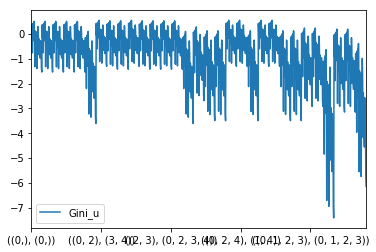

In [45]:
import matplotlib.pyplot as plt
df_giniu_all.plot()

In [47]:
df_giniu_all.sort_values(by=['Gini_u'])

,Gini_u
"((0, 1, 3, 4), (0, 1, 2, 3, 4))",-7.4096
"((0, 1, 3, 4), (0, 1, 3))",-6.9424
"((0, 1, 3, 4), (1, 2, 3, 4))",-6.9424
"((0, 1, 3, 4), (1, 3))",-6.7088
"((0, 1, 2, 3, 4), (0, 1, 2, 3, 4))",-6.1424
"((0, 1, 2, 3, 4), (1, 2, 3, 4))",-5.7456
"((0, 1, 2, 3, 4), (0, 1, 3))",-5.7456
"((0, 1, 2, 3, 4), (1, 3))",-5.5472
"((0, 1, 3, 4), (0, 1, 2, 3))",-5.5408
"((0, 1, 3, 4), (0, 1, 3, 4))",-5.0736


In [11]:
[i*j for i,j in zip([1,2,3],[1,2,3])]

[1, 4, 9]

In [6]:

size = (5, 5)
mat = np.random.choice([1,0],size)

orbi = OrBi(mat)
orbi.gini_mu([2,3],[2,3])

,0,1,2,3,4
0,0,0,1,1,1
1,0,1,1,1,0
2,1,1,1,1,0
3,1,0,0,0,0
4,0,1,0,0,1


,,0,1
2,3,0,0
3,0,1,1


[1 4]
For row partitions on cols of[2, 3]:

                 gini : 0.48
                 gini_m : -0.6000000000000001           


,0,1,2,3,4
0,0,0,1,1,1
1,0,1,1,1,0
2,1,1,1,1,0
3,1,0,0,0,0
4,0,1,0,0,1


[[0 1 1]
 [0 0 1]] [4 1 0] [1 3 1]


,1,3,1
,4,1,0
0,0,1,1
1,0,0,1


[1 2 4]
For column partitions on cols of[2, 3]:

                 gini : 0.5599999999999999
                 gini_m : 0.07999999999999996           


-0.47200000000000014

In [94]:

size = (5, 5)
mat = np.random.choice([1,0],size)

orbi = OrBi(mat)

# orbi.proj(2,[2,3])
orbi.r_par([2,3])



,0,1,2,3,4
0,0,1,1,0,1
1,1,0,0,1,0
2,0,1,1,0,1
3,1,1,0,1,1
4,0,1,1,1,1


0  1
2 1  0  1
  0  1  0
1 4  1  1

[0.16 0.16 0.04] [0.5 0.5 1. ]
For row partitions on cols of[2, 3]:

                 gini : 0.6399999999999999
                 gini_m : 0.7999999999999999           


(0.6399999999999999, 0.7999999999999999)

In [91]:
orbi.c_par([2,3])


,0,1,2,3,4
0,0,1,0,1,0
1,1,0,0,1,1
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,1,1,1


[[0 0 1]
 [0 1 0]] [0 1 4] [3 1 1]


3  1   
   0  1  4
0  0  0  1
1  0  1  0

For column partitions on cols of[2, 3]:

                 gini : 0.5599999999999999
                 gini_m : 0.96           


(0.5599999999999999, 0.96)

,0,1,2,3,4
0,0,1,0,1,0
1,1,0,0,1,1
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,1,1,1


0  1
2 2  0  0
  0  0  1
1 4  1  1

For row partitions on cols of[2, 3]:

                 gini : 0.6399999999999999
                 gini_m : 0.88           


,0,1,2,3,4
0,0,1,0,1,0
1,1,0,0,1,1
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,1,1,1


[[0 0 1]
 [0 1 0]] [0 1 4] [3 1 1]


3  1   
   0  1  4
0  0  0  1
1  0  1  0

For column partitions on cols of[2, 3]:

                 gini : 0.5599999999999999
                 gini_m : 0.96           


0.9951999999999999

In [90]:
orbi.rstr(2,[2,3])

Restriction of rows [2, 3] on column 2


,0,1,2,3,4
0,0,1,0,1,0
1,1,0,0,1,1
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,1,1,1


In [15]:
display(orbi.proj(2,[2,3]))
display(orbi.proj(2,[2,3]))

,0,1,2,3,4
0,0,1,1,0,1
1,0,0,0,1,1
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,1,1,0


,0,1,2,3,4
0,0,1,1,0,1
1,0,0,0,1,1
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,1,1,0


In [50]:
print(np.array([[1,1],[1,1],[1,0]]))
print(np.array([[1,1],[1,1],[1,0]]).shape)

a1,a2,a3,a4 = np.unique([[1,1],[1,1],[1,0]],axis=0,return_index=1, return_inverse=1,return_counts=1)
print(a1,a2,a3,a4)
np.sum(a1,axis=1)/a1.shape[1]


[[1 1]
 [1 1]
 [1 0]]
(3, 2)
[[1 0]
 [1 1]] [2 0] [1 1 0] [1 2]


array([0.5, 1. ])

In [27]:
mat[:,[2,3]]

array([[1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0]])

In [41]:
a = np.array([1,2])
np.sum( np.square(a/2))

1.25

In [42]:
np.dot(a,a)

5

In [63]:
pd.DataFrame(mat,columns=[[1,2,3,4,5],[5,4,3,2,1]])

,1,2,3,4,5
,5,4,3,2,1
0,0,0,1,1,1
1,0,0,0,0,1
2,0,1,1,0,1
3,1,1,0,1,1
4,0,0,0,1,1


In [97]:
np.power(2,a2)

array([4, 1])

In [8]:
def powerset(iterable):
    from itertools import chain, combinations
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


In [9]:
list(powerset([1,2,3]))[1:]

[(1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]

In [12]:
from itertools import product
list(product(list(powerset([1,2,3]))[1:], list(powerset([1,2,3]))[1:]))


[((1,), (1,)),
 ((1,), (2,)),
 ((1,), (3,)),
 ((1,), (1, 2)),
 ((1,), (1, 3)),
 ((1,), (2, 3)),
 ((1,), (1, 2, 3)),
 ((2,), (1,)),
 ((2,), (2,)),
 ((2,), (3,)),
 ((2,), (1, 2)),
 ((2,), (1, 3)),
 ((2,), (2, 3)),
 ((2,), (1, 2, 3)),
 ((3,), (1,)),
 ((3,), (2,)),
 ((3,), (3,)),
 ((3,), (1, 2)),
 ((3,), (1, 3)),
 ((3,), (2, 3)),
 ((3,), (1, 2, 3)),
 ((1, 2), (1,)),
 ((1, 2), (2,)),
 ((1, 2), (3,)),
 ((1, 2), (1, 2)),
 ((1, 2), (1, 3)),
 ((1, 2), (2, 3)),
 ((1, 2), (1, 2, 3)),
 ((1, 3), (1,)),
 ((1, 3), (2,)),
 ((1, 3), (3,)),
 ((1, 3), (1, 2)),
 ((1, 3), (1, 3)),
 ((1, 3), (2, 3)),
 ((1, 3), (1, 2, 3)),
 ((2, 3), (1,)),
 ((2, 3), (2,)),
 ((2, 3), (3,)),
 ((2, 3), (1, 2)),
 ((2, 3), (1, 3)),
 ((2, 3), (2, 3)),
 ((2, 3), (1, 2, 3)),
 ((1, 2, 3), (1,)),
 ((1, 2, 3), (2,)),
 ((1, 2, 3), (3,)),
 ((1, 2, 3), (1, 2)),
 ((1, 2, 3), (1, 3)),
 ((1, 2, 3), (2, 3)),
 ((1, 2, 3), (1, 2, 3))]

In [13]:
import pandas as pd
pd.DataFrame([1,2,3])

,0
0,1
1,2
2,3
